# CHE1147 Data Mining in Engineering
### Assignment 2 Jialin Shang 1005086256
## 1 Criminal investigation
### 1.2 Most and least frequent outgoing numbers
1. Identify the 3 numbers with the most counts of outgoing calls

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset 
df = pd.DataFrame(pd.read_excel('phone_data.xlsx'))
df.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0


In [3]:
# Construct a new dataframe, in which call type is outgoing
df_out = df[df["Call type"] == "Outgoing"]
df_out.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
5,10-11-2019,10:25:02 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,20,0


In [4]:
# Identify the 3 numbers with the most counts of outgoing calls
df_out_count = df_out['Number called (to/from)'].value_counts().rename_axis('The numbers the suspect called').reset_index(name = 'The counts of times the respective numbers were called')
df_out_count[:3]

,The numbers the suspect called,The counts of times the respective numbers were called
0,A_1,111
1,A_5,48
2,B_3,28


2. Identify the numbers with the least counts of outgoing calls. If there are ties (e.g. 1 phone call for many numbers) then identify all numbers.

In [5]:
# Find the least count value of outgoing calls 
df_out_count['The counts of times the respective numbers were called'].min()

1

In [6]:
# Identify the numbers with the least counts of outgoing calls
df_out_count[df_out_count['The counts of times the respective numbers were called'] == df_out_count['The counts of times the respective numbers were called'].min()]

,The numbers the suspect called,The counts of times the respective numbers were called
18,F_2,1
19,F_4,1
20,F_3,1
21,E_5,1
22,F_5,1
23,F_1,1
24,D_2,1
25,E_4,1
26,D_5,1
27,D_1,1


### 1.3 Highest and lowest total duration of outgoing calls
1. Repeat the same exercise as in the previous subsection, but with the total duration per number called.

In [7]:
# Identify the 3 numbers with the longest total duration of outgoing calls
df_out_dur = df_out.groupby(['Number called (to/from)']).Duration.sum().rename_axis('The numbers the suspect called').reset_index(name = 'The total duration each number were called in the period given')
df_out_dur.sort_values(by = 'The total duration each number were called in the period given', ascending = False)[:3]

,The numbers the suspect called,The total duration each number were called in the period given
0,A_1,1146
4,A_5,427
3,A_4,96


In [8]:
# Find the value of shortest total duration of outgoing calls
df_out_dur['The total duration each number were called in the period given'].min()

1

In [9]:
# Identify the numbers with the shortest total duration of outgoing calls per number
df_out_dur[df_out_dur['The total duration each number were called in the period given'] == df_out_dur['The total duration each number were called in the period given'].min()]

,The numbers the suspect called,The total duration each number were called in the period given
10,C_1,1
19,D_5,1
23,E_4,1
24,E_5,1


### 1.4 Location of outgoing calls
1. What are the number of counts for every location of outgoing calls?

In [10]:
df_out_loc_1 = df_out['From city'].value_counts().rename_axis('The location of the outgoing call (From city)').reset_index(name = 'The counts of outgoing calls per location')
df_out_loc_1

,The location of the outgoing call (From city),The counts of outgoing calls per location
0,TORONTO ON,244
1,NEWMARKET ON,2
2,CLAREMONT ON,1


In [11]:
df_out_loc_2 = df_out['To city'].value_counts().rename_axis('The location of the outgoing call (To city)').reset_index(name = 'The counts of outgoing calls per location')
df_out_loc_2

,The location of the outgoing call (To city),The counts of outgoing calls per location
0,TORONTO ON,199
1,OAK RIDGES ON,28
2,RICHMONDHL ON,10
3,THORNHILL ON,3
4,800 SERV SERV 800 ON,1
5,AURORA ON,1
6,STOUFFVL ON,1
7,866 SERV SERV 866 ON,1
8,888 SERV SERV 888 ON,1
9,877 SERV SERV 877 ON,1


### 1.5 Incoming and Outgoing calls pattern
1. Calculate the total duration of incoming and outgoing calls per month.

In [12]:
df.style.format({"DOB": lambda t: t.strftime("%m-%d-%Y")})
df['Month'] = pd.to_datetime(df['Date']).dt.month 
total_duration = df.pivot_table(values = 'Duration', index = 'Month', columns = 'Call type', aggfunc = 'sum') 
total_duration

Call type,Incoming,Outgoing
Month,,
7,84,190
8,54,281
9,244,714
10,63,621
11,87,196


2. Plot the results in one graph for both incoming and outgoing calls.

Text(0.5, 1.0, 'Total Duration of Calls')

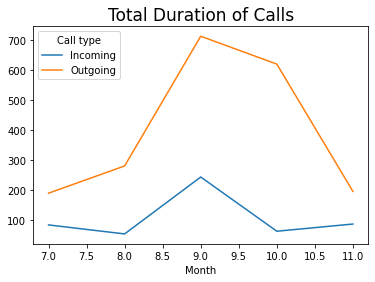

In [13]:
total_duration.plot(kind = 'line')
plt.title('Total Duration of Calls', fontsize = 17)

3. Do you see anything unusual in the pattern? E.g. does this look like a phone line that
was used for criminal activities or more like a personal phone?

The blue line represents the incoming phone call and the yellow line represents the outgoing phone call. Throughout these months, we can clearly see that the yellow line is always above the blue line, which means that the total outgoing duration is much greater than the incoming duration. 

There exists a peak in September for both incoming and outgoing duration. To be more specific, the total duration of incoming phone calls is 244 and the total duration of outgoing phone calls is 714, almost three times, this is unusual. It is possible that the criminals want to make plans for October.

### 1.6 Distribution of calls
Plot the histogram of the outbound call counts; e.g. x-axis: the call counts per client
called, y-axis: number of clients called.

Text(0.5, 1.0, 'The Histogram Of The Outbound Call Counts')

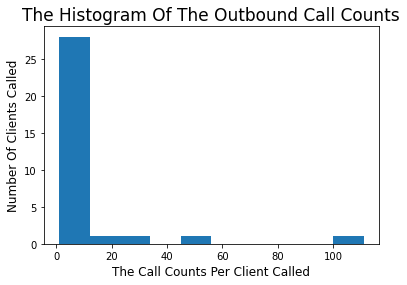

In [14]:
df_out_count['The counts of times the respective numbers were called'].plot(kind = 'hist')
plt.xlabel('The Call Counts Per Client Called', fontsize = 12)
plt.ylabel('Number Of Clients Called', fontsize = 12)
plt.title('The Histogram Of The Outbound Call Counts', fontsize = 17)

## 2 The ergodicity problem in economics
### 2.3 Coding the problem
1. Generate a pandas dataframe that simulates N coin tosses for w gamblers with the np.random.rand function. Set N=100 coin tosses and w=100 gamblers and add the prefix ’prob ’ to the column name.

In [15]:
N = 100
w = 100

s = pd.DataFrame(np.random.rand(N, w))
s = s.add_prefix('prob_')

s.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.431590,0.551868,0.426115,0.137728,0.532861,0.014028,0.954242,0.808414,0.273577,0.556464,...,0.965959,0.235752,0.869450,0.473398,0.850899,0.945914,0.477064,0.828641,0.900896,0.991984
1,0.781783,0.924542,0.784999,0.251843,0.629564,0.267584,0.995456,0.831503,0.294976,0.669386,...,0.802858,0.869955,0.375868,0.400793,0.610775,0.787518,0.191459,0.029389,0.816657,0.056501
2,0.727651,0.988645,0.370375,0.455760,0.210239,0.607991,0.126625,0.032260,0.681423,0.974913,...,0.749723,0.253212,0.068708,0.483457,0.326873,0.150550,0.580360,0.617642,0.449724,0.838007
3,0.567591,0.936091,0.672400,0.859947,0.430922,0.792932,0.841345,0.005967,0.883155,0.043362,...,0.000709,0.935207,0.735201,0.036387,0.020590,0.010475,0.890320,0.370563,0.518218,0.817798
4,0.517926,0.556672,0.608109,0.034859,0.551375,0.500605,0.043228,0.755409,0.267361,0.876845,...,0.734526,0.763135,0.504237,0.456617,0.951482,0.870696,0.698701,0.535568,0.097810,0.081915


2. Initialize an additional w columns [’balance ’ + str(x)] with the value 100 to capture the initial wealth of 100, where: x in range(0, w).

In [16]:
N = 100
w = 100
add = pd.DataFrame(np.ones(shape = (N, w))) * 100
add = add.add_prefix('balance_')
s1 = pd.concat([s, add],axis = 1)
s1.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.431590,0.551868,0.426115,0.137728,0.532861,0.014028,0.954242,0.808414,0.273577,0.556464,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.781783,0.924542,0.784999,0.251843,0.629564,0.267584,0.995456,0.831503,0.294976,0.669386,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.727651,0.988645,0.370375,0.455760,0.210239,0.607991,0.126625,0.032260,0.681423,0.974913,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.567591,0.936091,0.672400,0.859947,0.430922,0.792932,0.841345,0.005967,0.883155,0.043362,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.517926,0.556672,0.608109,0.034859,0.551375,0.500605,0.043228,0.755409,0.267361,0.876845,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


3. Create a two-level for loop that iterates through rows 1 to N first and columns w to 2×w next implementing the calculation logic for every prob-balance pair

Balance(i) =

1.5 * Balance(i-1); if prob(i-1) >= 0.5

0.6 * Balance(i-1); if prob(i-1) < 0.5

In [17]:
N = 100
w = 100

for a in range(N - 1):
  for b in np.arange(w, 2 * w):
    if s1.iloc[a, b - w] >= 0.5:
      s1.iloc[a + 1, b] = 1.5 * s1.iloc[a, b]
    else:
      s1.iloc[a + 1, b] = 0.6 * s1.iloc[a, b]
s1

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.431590,0.551868,0.426115,0.137728,0.532861,0.014028,0.954242,0.808414,0.273577,0.556464,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,0.781783,0.924542,0.784999,0.251843,0.629564,0.267584,0.995456,0.831503,0.294976,0.669386,...,150.000000,60.000000,150.000000,60.000000,150.000000,150.000000,60.000000,150.000000,150.000000,150.000000
2,0.727651,0.988645,0.370375,0.455760,0.210239,0.607991,0.126625,0.032260,0.681423,0.974913,...,225.000000,90.000000,90.000000,36.000000,225.000000,225.000000,36.000000,90.000000,225.000000,90.000000
3,0.567591,0.936091,0.672400,0.859947,0.430922,0.792932,0.841345,0.005967,0.883155,0.043362,...,337.500000,54.000000,54.000000,21.600000,135.000000,135.000000,54.000000,135.000000,135.000000,135.000000
4,0.517926,0.556672,0.608109,0.034859,0.551375,0.500605,0.043228,0.755409,0.267361,0.876845,...,202.500000,81.000000,81.000000,12.960000,81.000000,81.000000,81.000000,81.000000,202.500000,202.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.705959,0.331065,0.353740,0.227182,0.065605,0.500756,0.221638,0.286660,0.967406,0.270694,...,1.060448,41.423733,103.559333,0.001737,6.627797,0.027147,103.559333,41.423733,258.898333,0.010859
96,0.689029,0.090408,0.427537,0.221847,0.256548,0.608907,0.547497,0.593427,0.656115,0.282640,...,1.590671,62.135600,62.135600,0.001042,3.976678,0.016288,155.339000,24.854240,155.339000,0.006515
97,0.715347,0.378572,0.258460,0.769760,0.994036,0.911342,0.365930,0.694342,0.369142,0.483653,...,2.386007,37.281360,37.281360,0.001564,2.386007,0.009773,233.008500,14.912544,233.008500,0.003909
98,0.998784,0.432128,0.227087,0.379266,0.379566,0.696829,0.230667,0.421018,0.163376,0.674659,...,1.431604,55.922040,22.368816,0.002346,3.579011,0.014660,139.805100,22.368816,139.805100,0.002346


4. Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculate
how many gamblers have more than their initial 100. What happens when you increase N to 1,000 (Figure 2 in the original paper, except the red and blue line)? How many gamblers with more than 100$do you have at t=1,000?

In [18]:
s_balance = s1.iloc[:,w:]
s_balance.head()

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,100.0,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.00,100.0,100.0,100.0,100.0,100.0,100.0
1,60.0,150.00,60.0,60.0,150.0,60.0,150.0,150.0,60.0,150.0,...,150.0,60.0,150.0,60.00,150.0,150.0,60.0,150.0,150.0,150.0
2,90.0,225.00,90.0,36.0,225.0,36.0,225.0,225.0,36.0,225.0,...,225.0,90.0,90.0,36.00,225.0,225.0,36.0,90.0,225.0,90.0
3,135.0,337.50,54.0,21.6,135.0,54.0,135.0,135.0,54.0,337.5,...,337.5,54.0,54.0,21.60,135.0,135.0,54.0,135.0,135.0,135.0
4,202.5,506.25,81.0,32.4,81.0,81.0,202.5,81.0,81.0,202.5,...,202.5,81.0,81.0,12.96,81.0,81.0,81.0,81.0,202.5,202.5


The number of gamblers that is over their original 100 is 16


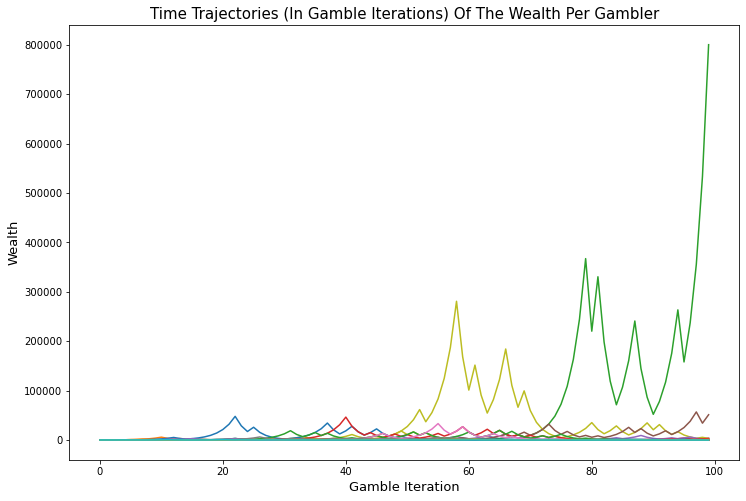

In [19]:
# When N = 100
N = 100
w = 100

s_balance.plot(figsize = (12,8), legend = None)
plt.title('Time Trajectories (In Gamble Iterations) Of The Wealth Per Gambler', fontsize = 15)
plt.xlabel('Gamble Iteration', fontsize = 13)
plt.ylabel('Wealth', fontsize = 13)

print('The number of gamblers that is over their original 100 is', (s_balance.iloc[N - 1] > 100).sum())

In [20]:
# When N = 1000, repeat the above steps
N = 1000
w = 100

ss = pd.DataFrame(np.random.rand(N, w))
ss = ss.add_prefix('prob_')
addd = pd.DataFrame(np.ones(shape = (N, w))) * 100
addd = addd.add_prefix('balance_')
s2 = pd.concat([ss, addd],axis = 1)
s2.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.451606,0.741412,0.791999,0.277098,0.359187,0.814686,0.814850,0.614166,0.014612,0.215872,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.715794,0.497288,0.699313,0.592467,0.688057,0.229666,0.546920,0.828571,0.826223,0.069286,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.355838,0.353372,0.824679,0.017892,0.043994,0.862417,0.030291,0.030646,0.599608,0.910641,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.422619,0.050964,0.096822,0.464155,0.724206,0.101769,0.042705,0.425706,0.992271,0.550485,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.507300,0.759435,0.232644,0.434830,0.267048,0.475266,0.559308,0.383867,0.537215,0.833330,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [21]:
# Construct a for loop, repeat the above algorithm and steps

N = 1000
w = 100

for a in range(N - 1):
  for b in np.arange(w, 2 * w):
    if s2.iloc[a, b - w] >= 0.5:
      s2.iloc[a + 1, b] = 1.5 * s2.iloc[a, b]
    else:
      s2.iloc[a + 1, b] = 0.6 * s2.iloc[a, b]
s2

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.451606,0.741412,0.791999,0.277098,0.359187,0.814686,0.814850,0.614166,0.014612,0.215872,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
1,0.715794,0.497288,0.699313,0.592467,0.688057,0.229666,0.546920,0.828571,0.826223,0.069286,...,1.500000e+02,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
2,0.355838,0.353372,0.824679,0.017892,0.043994,0.862417,0.030291,0.030646,0.599608,0.910641,...,2.250000e+02,3.600000e+01,3.600000e+01,9.000000e+01,9.000000e+01,9.000000e+01,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
3,0.422619,0.050964,0.096822,0.464155,0.724206,0.101769,0.042705,0.425706,0.992271,0.550485,...,3.375000e+02,2.160000e+01,2.160000e+01,5.400000e+01,5.400000e+01,5.400000e+01,3.375000e+02,3.375000e+02,3.375000e+02,1.350000e+02
4,0.507300,0.759435,0.232644,0.434830,0.267048,0.475266,0.559308,0.383867,0.537215,0.833330,...,2.025000e+02,3.240000e+01,1.296000e+01,8.100000e+01,8.100000e+01,3.240000e+01,2.025000e+02,5.062500e+02,5.062500e+02,2.025000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.156893,0.482871,0.620182,0.946633,0.181824,0.114212,0.494450,0.531560,0.536235,0.678904,...,1.869383e-28,2.533486e-15,1.782783e-24,6.641383e-19,4.456956e-24,1.062621e-19,2.785598e-23,1.013395e-15,2.007235e-34,6.185270e-13
996,0.118131,0.813680,0.698041,0.273948,0.627700,0.905171,0.847864,0.576985,0.432804,0.251142,...,1.121630e-28,3.800230e-15,2.674174e-24,9.962074e-19,2.674174e-24,6.375727e-20,1.671359e-23,6.080367e-16,3.010852e-34,9.277904e-13
997,0.541156,0.521658,0.999633,0.132898,0.347949,0.267905,0.712521,0.941419,0.608547,0.891117,...,6.729779e-29,2.280138e-15,4.011261e-24,5.977244e-19,1.604504e-24,9.563591e-20,2.507038e-23,9.120551e-16,4.516278e-34,5.566743e-13
998,0.566191,0.840133,0.660369,0.065508,0.218474,0.010251,0.101608,0.438482,0.906977,0.076535,...,4.037867e-29,1.368083e-15,6.016891e-24,8.965867e-19,2.406756e-24,5.738155e-20,3.760557e-23,1.368083e-15,2.709767e-34,3.340046e-13


In [22]:
ss_balance = s2.iloc[:, w:]
ss_balance.head()

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.00,100.0,100.0,100.0,100.0,100.00,100.00,100.0
1,60.0,150.0,150.0,60.0,60.0,150.0,150.0,150.0,60.0,60.0,...,150.0,60.0,60.00,60.0,60.0,150.0,150.0,150.00,150.00,150.0
2,90.0,90.0,225.0,90.0,90.0,90.0,225.0,225.0,90.0,36.0,...,225.0,36.0,36.00,90.0,90.0,90.0,225.0,225.00,225.00,225.0
3,54.0,54.0,337.5,54.0,54.0,135.0,135.0,135.0,135.0,54.0,...,337.5,21.6,21.60,54.0,54.0,54.0,337.5,337.50,337.50,135.0
4,32.4,32.4,202.5,32.4,81.0,81.0,81.0,81.0,202.5,81.0,...,202.5,32.4,12.96,81.0,81.0,32.4,202.5,506.25,506.25,202.5


The number of gamblers that is over their original 100 is 0


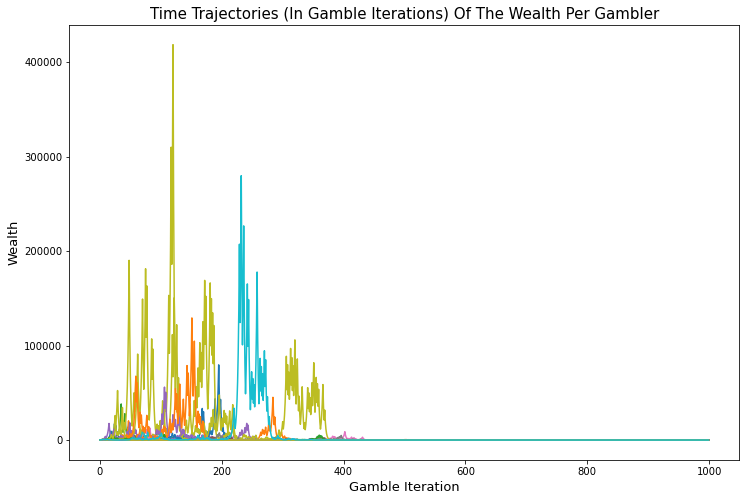

In [23]:
N = 1000
w = 100

ss_balance.plot(figsize = (12,8), legend = None)
plt.title('Time Trajectories (In Gamble Iterations) Of The Wealth Per Gambler', fontsize = 15)
plt.xlabel('Gamble Iteration', fontsize = 13)
plt.ylabel('Wealth', fontsize = 13)

print('The number of gamblers that is over their original 100 is', (ss_balance.iloc[N - 1]>100).sum())

5. Plot the time trajectories of the mean and median wealth at every time point from
0 to 1,000. Try both linear and logarithmic scaler for the wealth axis. What are your
observations?

In [24]:
s_mean_median = pd.DataFrame(pd.concat([ss_balance.mean(axis = 1), ss_balance.median(axis = 1)], axis = 1))
s_mean_median.columns = ['mean', 'median']
s_mean_median.head()

,mean,median
0,100.0000,100.0
1,105.9000,150.0
2,112.9500,90.0
3,115.4790,54.0
4,117.4743,81.0


Text(0, 0.5, 'Wealth')

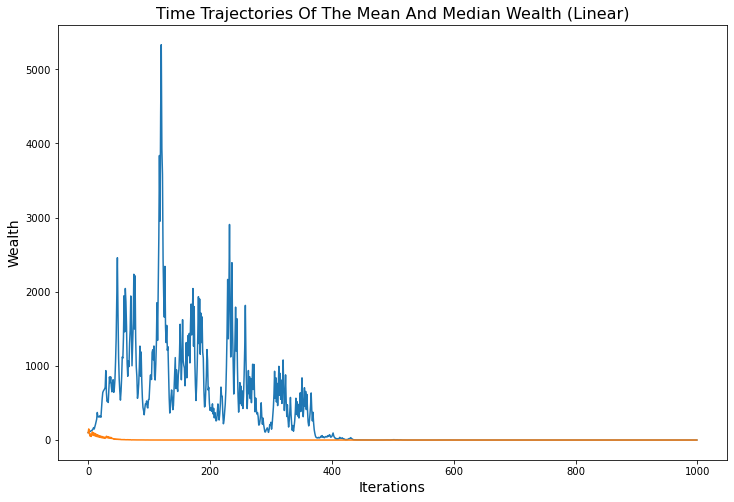

In [25]:
s_mean_median.plot(figsize = (12,8), legend = None)
plt.title('Time Trajectories Of The Mean And Median Wealth (Linear)', fontsize = 16)
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('Wealth', fontsize = 14)

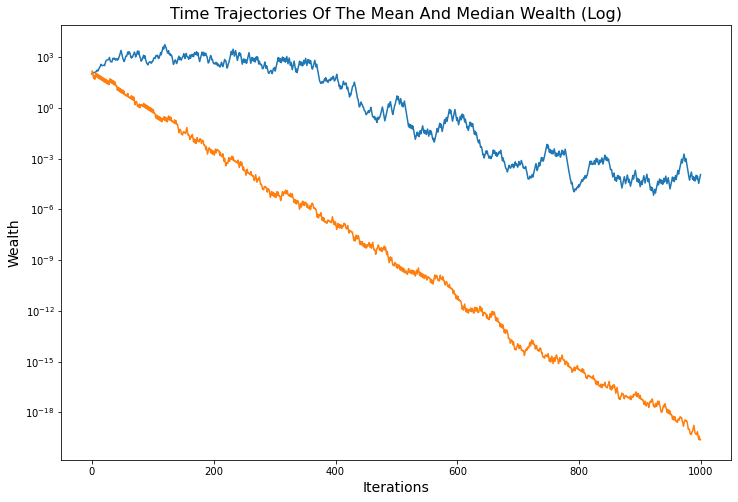

In [26]:
s_mean_median.plot(figsize = (12, 8), legend = None)
plt.title('Time Trajectories Of The Mean And Median Wealth (Log)', fontsize = 16)
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('Wealth', fontsize = 14)
plt.yscale('log')

Observations:

As the number of N becomes larger and larger, both mean and median go down. 

From the first graph, the ‘Time Trajectories Of The Mean And Median Wealth (Linear)’, we can see that there exists a huge difference between mean and median before t = 400. After t = 400, mean and median get closer and closer so that there is almost no significant difference. This implies that few people can win in this game.

From the second graph, the ‘Time Trajectories Of The Mean And Median Wealth (Log)’, we can see that the gap represents the percentage change between mean and median keeps increasing as the number of N increases. 


6. Repeat steps 3-5 with N=10 and w=1,000 with the following logic, How are the results different than the previous logic?

In [27]:
N = 10
w = 1000

n = pd.DataFrame(np.random.rand(N, w))
n = n.add_prefix('prob_')
n.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_990,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
0,0.382212,0.314659,0.844396,0.291642,0.443260,0.654450,0.057695,0.161221,0.622727,0.595132,...,0.704755,0.574972,0.391841,0.598270,0.621877,0.344011,0.329119,0.932287,0.098255,0.599545
1,0.089863,0.728748,0.844948,0.366416,0.732555,0.198281,0.517817,0.383310,0.365573,0.102577,...,0.549416,0.394959,0.960423,0.097872,0.528634,0.820465,0.435801,0.633790,0.801111,0.939060
2,0.889684,0.896640,0.641762,0.706211,0.726870,0.896563,0.543149,0.144942,0.099232,0.895423,...,0.052345,0.442053,0.468281,0.996503,0.093170,0.477567,0.058588,0.856875,0.594292,0.228658
3,0.891846,0.889408,0.249171,0.120771,0.261809,0.745372,0.778606,0.657657,0.773270,0.764569,...,0.750982,0.434768,0.381250,0.121072,0.699352,0.666906,0.016914,0.360863,0.533238,0.307206
4,0.491876,0.686507,0.306225,0.302547,0.405300,0.973562,0.951488,0.835879,0.127601,0.897761,...,0.763562,0.219607,0.426169,0.827070,0.075113,0.673812,0.170546,0.850638,0.108567,0.636945


In [28]:
add_n = pd.DataFrame(np.ones(shape = (N, w))) * 100
add_n = add_n.add_prefix('balance_')
n1 = pd.concat([n, add_n],axis = 1)
n1.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,0.382212,0.314659,0.844396,0.291642,0.443260,0.654450,0.057695,0.161221,0.622727,0.595132,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.089863,0.728748,0.844948,0.366416,0.732555,0.198281,0.517817,0.383310,0.365573,0.102577,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.889684,0.896640,0.641762,0.706211,0.726870,0.896563,0.543149,0.144942,0.099232,0.895423,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.891846,0.889408,0.249171,0.120771,0.261809,0.745372,0.778606,0.657657,0.773270,0.764569,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.491876,0.686507,0.306225,0.302547,0.405300,0.973562,0.951488,0.835879,0.127601,0.897761,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [29]:
for a in range(N - 1):
  for b in np.arange(w, 2 * w):
    if n1.iloc[a, b - w] >= 0.5:
      n1.iloc[a + 1, b] = (50 + n1.iloc[a, b])
    else:
      n1.iloc[a + 1, b] = (n1.iloc[a, b] - 40)
n1.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,0.382212,0.314659,0.844396,0.291642,0.443260,0.654450,0.057695,0.161221,0.622727,0.595132,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.089863,0.728748,0.844948,0.366416,0.732555,0.198281,0.517817,0.383310,0.365573,0.102577,...,150.0,150.0,60.0,150.0,150.0,60.0,60.0,150.0,60.0,150.0
2,0.889684,0.896640,0.641762,0.706211,0.726870,0.896563,0.543149,0.144942,0.099232,0.895423,...,200.0,110.0,110.0,110.0,200.0,110.0,20.0,200.0,110.0,200.0
3,0.891846,0.889408,0.249171,0.120771,0.261809,0.745372,0.778606,0.657657,0.773270,0.764569,...,160.0,70.0,70.0,160.0,160.0,70.0,-20.0,250.0,160.0,160.0
4,0.491876,0.686507,0.306225,0.302547,0.405300,0.973562,0.951488,0.835879,0.127601,0.897761,...,210.0,30.0,30.0,120.0,210.0,120.0,-60.0,210.0,210.0,120.0


In [30]:
n_balance = n1.iloc[:,w:]
n_balance.head()

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,60.0,60.0,150.0,60.0,60.0,150.0,60.0,60.0,150.0,150.0,...,150.0,150.0,60.0,150.0,150.0,60.0,60.0,150.0,60.0,150.0
2,20.0,110.0,200.0,20.0,110.0,110.0,110.0,20.0,110.0,110.0,...,200.0,110.0,110.0,110.0,200.0,110.0,20.0,200.0,110.0,200.0
3,70.0,160.0,250.0,70.0,160.0,160.0,160.0,-20.0,70.0,160.0,...,160.0,70.0,70.0,160.0,160.0,70.0,-20.0,250.0,160.0,160.0
4,120.0,210.0,210.0,30.0,120.0,210.0,210.0,30.0,120.0,210.0,...,210.0,30.0,30.0,120.0,210.0,120.0,-60.0,210.0,210.0,120.0


The number of gamblers that is over their original 100 is 486


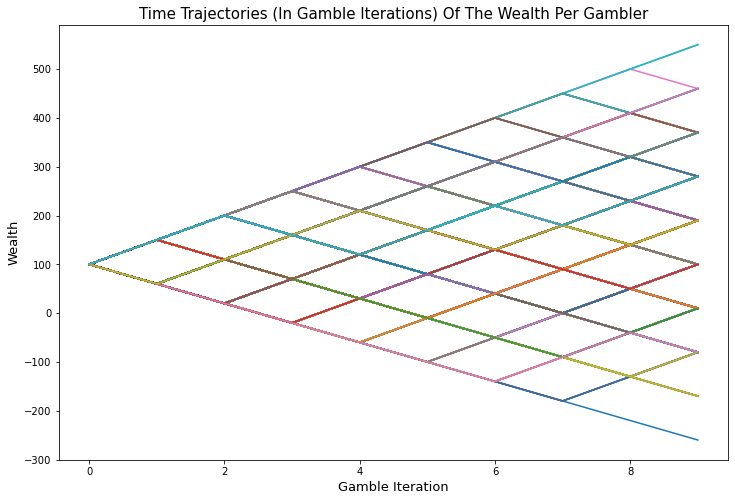

In [31]:
n_balance.plot(figsize = (12,8), legend = None)
plt.title('Time Trajectories (In Gamble Iterations) Of The Wealth Per Gambler', fontsize = 15)
plt.xlabel('Gamble Iteration', fontsize = 13)
plt.ylabel('Wealth', fontsize = 13)

print('The number of gamblers that is over their original 100 is', (n_balance.iloc[N - 1] > 100).sum())

In [32]:
# When N = 1000, repeat the above steps
N = 1000
w = 1000

nn = pd.DataFrame(np.random.rand(N, w))
nn = nn.add_prefix('prob_')
nn.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_990,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
0,0.725726,0.694857,0.201104,0.964448,0.612011,0.523807,0.297388,0.216230,0.661887,0.717810,...,0.383068,0.908309,0.499675,0.857301,0.548497,0.414718,0.384398,0.493069,0.048146,0.099427
1,0.144906,0.686667,0.034136,0.692209,0.270233,0.654018,0.486531,0.294992,0.005119,0.476370,...,0.283561,0.912206,0.551764,0.684101,0.722093,0.774463,0.555771,0.391905,0.575177,0.055179
2,0.425571,0.163758,0.675826,0.461572,0.337015,0.897249,0.710528,0.390609,0.316191,0.756462,...,0.598800,0.307507,0.464940,0.827161,0.750570,0.062937,0.715485,0.963505,0.972607,0.859437
3,0.977060,0.452058,0.751607,0.988662,0.842427,0.505770,0.052950,0.247883,0.815294,0.803373,...,0.276012,0.751721,0.485495,0.756524,0.998623,0.241044,0.278839,0.782706,0.118145,0.578555
4,0.075356,0.765746,0.020063,0.644762,0.242525,0.395515,0.530407,0.668459,0.947298,0.154719,...,0.586618,0.271527,0.455970,0.009871,0.771390,0.958314,0.679796,0.721266,0.543198,0.087347


In [33]:
add_nn = pd.DataFrame(np.ones(shape = (N, w))) * 100
add_nn = add_nn.add_prefix('balance_')
n2 = pd.concat([nn, add_nn], axis = 1)
n2.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,0.725726,0.694857,0.201104,0.964448,0.612011,0.523807,0.297388,0.216230,0.661887,0.717810,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.144906,0.686667,0.034136,0.692209,0.270233,0.654018,0.486531,0.294992,0.005119,0.476370,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.425571,0.163758,0.675826,0.461572,0.337015,0.897249,0.710528,0.390609,0.316191,0.756462,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.977060,0.452058,0.751607,0.988662,0.842427,0.505770,0.052950,0.247883,0.815294,0.803373,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.075356,0.765746,0.020063,0.644762,0.242525,0.395515,0.530407,0.668459,0.947298,0.154719,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [34]:
# Construct a for loop, repeat the above algorithm and steps

N = 1000
w = 1000

for a in range(N - 1):
  for b in np.arange(w, 2 * w):
    if n2.iloc[a, b - w] >= 0.5:
      n2.iloc[a + 1, b] = (50 + n2.iloc[a, b])
    else:
      n2.iloc[a + 1, b] = (n2.iloc[a, b] - 40)
n2.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,0.725726,0.694857,0.201104,0.964448,0.612011,0.523807,0.297388,0.216230,0.661887,0.717810,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.144906,0.686667,0.034136,0.692209,0.270233,0.654018,0.486531,0.294992,0.005119,0.476370,...,60.0,150.0,60.0,150.0,150.0,60.0,60.0,60.0,60.0,60.0
2,0.425571,0.163758,0.675826,0.461572,0.337015,0.897249,0.710528,0.390609,0.316191,0.756462,...,20.0,200.0,110.0,200.0,200.0,110.0,110.0,20.0,110.0,20.0
3,0.977060,0.452058,0.751607,0.988662,0.842427,0.505770,0.052950,0.247883,0.815294,0.803373,...,70.0,160.0,70.0,250.0,250.0,70.0,160.0,70.0,160.0,70.0
4,0.075356,0.765746,0.020063,0.644762,0.242525,0.395515,0.530407,0.668459,0.947298,0.154719,...,30.0,210.0,30.0,300.0,300.0,30.0,120.0,120.0,120.0,120.0


In [35]:
nn_balance = n2.iloc[:, w:]
nn_balance.head()

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,150.0,150.0,60.0,150.0,150.0,150.0,60.0,60.0,150.0,150.0,...,60.0,150.0,60.0,150.0,150.0,60.0,60.0,60.0,60.0,60.0
2,110.0,200.0,20.0,200.0,110.0,200.0,20.0,20.0,110.0,110.0,...,20.0,200.0,110.0,200.0,200.0,110.0,110.0,20.0,110.0,20.0
3,70.0,160.0,70.0,160.0,70.0,250.0,70.0,-20.0,70.0,160.0,...,70.0,160.0,70.0,250.0,250.0,70.0,160.0,70.0,160.0,70.0
4,120.0,120.0,120.0,210.0,120.0,300.0,30.0,-60.0,120.0,210.0,...,30.0,210.0,30.0,300.0,300.0,30.0,120.0,120.0,120.0,120.0


The number of gamblers that is over their original 100 is 1000


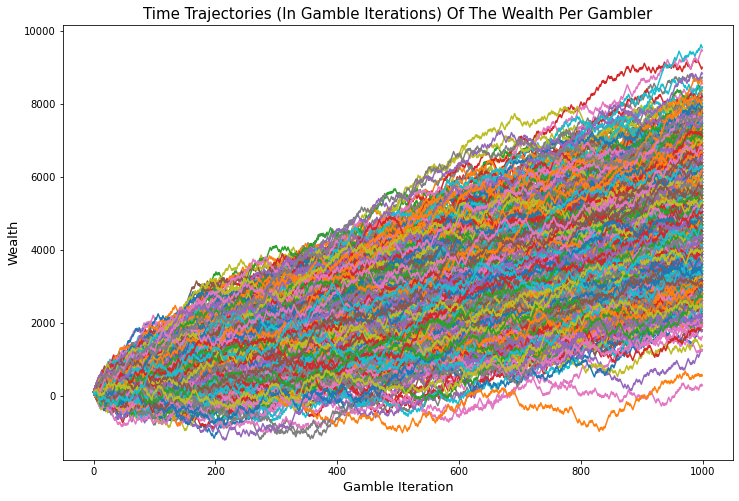

In [36]:
N = 1000
w = 100

nn_balance.plot(figsize = (12,8), legend = None)
plt.title('Time Trajectories (In Gamble Iterations) Of The Wealth Per Gambler', fontsize = 15)
plt.xlabel('Gamble Iteration', fontsize = 13)
plt.ylabel('Wealth', fontsize = 13)

print('The number of gamblers that is over their original 100 is', (nn_balance.iloc[N - 1] > 100).sum())

In [37]:
n_mean_median = pd.DataFrame(pd.concat([nn_balance.mean(axis = 1), nn_balance.median(axis = 1)], axis = 1))
n_mean_median.columns = ['mean', 'median']
n_mean_median.head()

,mean,median
0,100.00,100.0
1,104.82,60.0
2,109.19,110.0
3,114.37,70.0
4,118.56,120.0


Text(0, 0.5, 'Wealth')

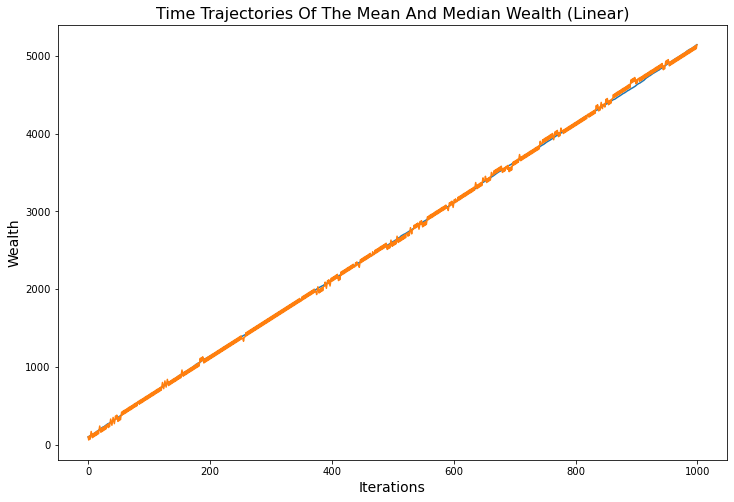

In [38]:
n_mean_median.plot(figsize = (12,8), legend = None)
plt.title('Time Trajectories Of The Mean And Median Wealth (Linear)', fontsize = 16)
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('Wealth', fontsize = 14)

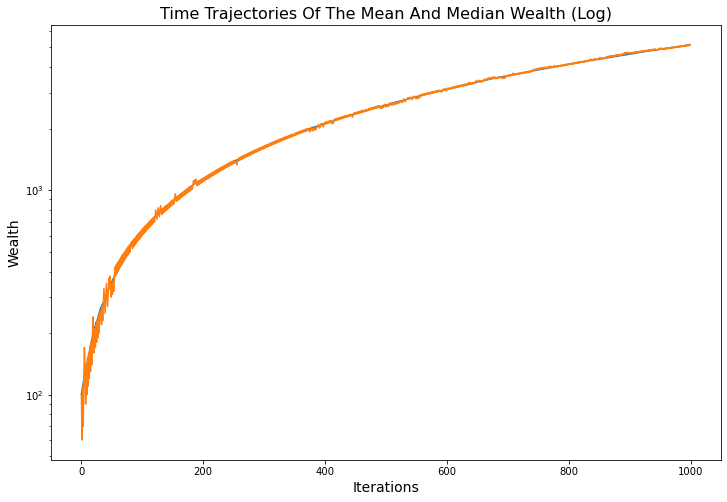

In [39]:
n_mean_median.plot(figsize = (12, 8), legend = None)
plt.title('Time Trajectories Of The Mean And Median Wealth (Log)', fontsize = 16)
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('Wealth', fontsize = 14)
plt.yscale('log')

Observations:

Both linear and log graph show that as the number of N increases, the mean and median will increase as well. It means that the more times the gamblers play, the more money they will gain. Therefore, all gamblers will win under the new logic.